<a href="https://colab.research.google.com/github/Yutthana-BJ/Project_YB/blob/main/Text%20Classification%20of%20Amazon%20User%20Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Classification of Amazon User Reviews Using Natural Language Processing**

---

In [2]:
!pip install scikit-learn
!pip install langdetect
!pip install nltk
!pip install emoji
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=7e8d1377c1c06e4c44252d020b8f32f6995dd79a7268abb6eaa78e5723bdd4d9
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8

# 1. Get Data
Download the data set from https://www.kaggle.com/datasets/ashishkumarak/amazon-shopping-reviews-daily-updated?resource=download

Then that, save the downloaded data in Google Drive.

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_set = '/content/drive/MyDrive/Colab Notebooks/DataSet/amazon_reviews.csv.zip'
df = pd.read_csv(data_set)
df

Mounted at /content/drive


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ce07c326-24b7-4016-ab3a-b98490b6ccb6,Lavinia Nevonga,Great company,5,0,28.11.2.100,2024-06-13 21:05:22,28.11.2.100
1,c3bf6d2e-4a67-4dbe-a274-1fda4648ce31,Richard “Rich” Lehman,Getting refund and deleting account. We didn't...,1,0,28.11.2.100,2024-06-13 20:57:36,28.11.2.100
2,def89d93-b293-4247-bf9f-d55d6a8feca3,chandler clark,"I have had Amazon for a long time, but now I s...",2,0,28.11.2.100,2024-06-13 20:55:10,28.11.2.100
3,436aa710-27fe-453e-88fd-2546de90ab63,Tony Codallo,Easy to use,5,0,28.11.2.100,2024-06-13 20:54:43,28.11.2.100
4,f0d74c55-9aa5-41ff-8489-9b04e2b3f1bc,Atika Lee,"I am very happy to shop in Amazon, I trust all...",5,0,28.11.2.100,2024-06-13 20:48:32,28.11.2.100
...,...,...,...,...,...,...,...,...
53042,ac82191a-e776-42a0-8e30-91eabb763968,Mary Mora,Amazon Smile donates. Make sure you get all se...,5,0,26.1.2.100,2023-01-16 06:12:14,26.1.2.100
53043,3aa6af38-b044-4257-9cf3-b94c437da0ef,Marie Elliott,After having problems with the app and having ...,5,1,22.18.0.100,2021-09-24 12:01:29,22.18.0.100
53044,727ec38a-c633-48f4-a302-66e52740a43c,Dan Preston,"Used to be great. Got greedy, they ruined the ...",1,0,26.9.0.100,2023-05-15 18:27:24,26.9.0.100
53045,615a9643-cd36-4010-9a81-8763bac11ddf,Jhosh,New search bar location sucks. At least give m...,2,0,26.12.0.100,2023-06-11 15:24:08,26.12.0.100


# 2. Data Preparation
Validate, clean, and transform the dataset into the desired format and make sure it is ready for training model.

In [4]:
# Select only columns 'content' and 'score' to train the model
df = df[['content', 'score']]

# Convert the text to all lowercase and remove duplicate rows to reduce the complexity of the data
df['content'] = df['content'].str.lower()
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52673 entries, 0 to 53046
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  52671 non-null  object
 1   score    52673 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
# Delete rows with missing values
df = df.dropna(subset=['content'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52671 entries, 0 to 53046
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  52671 non-null  object
 1   score    52671 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


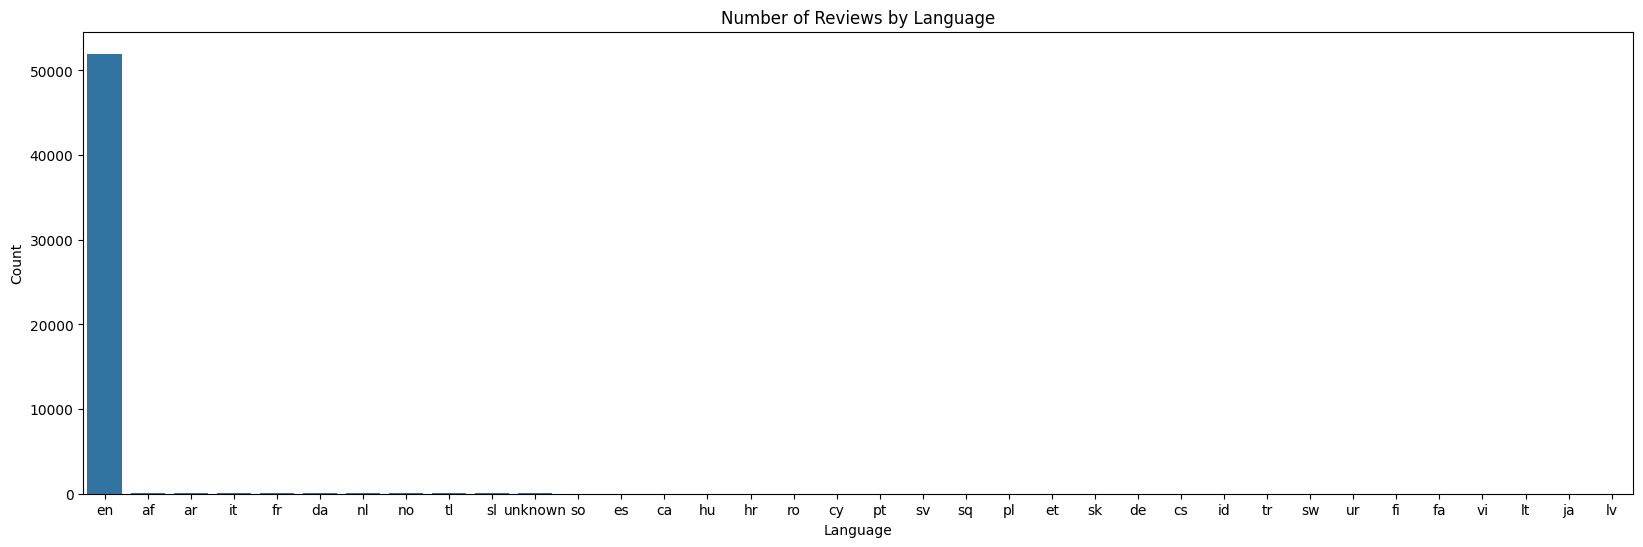

In [6]:
# Classify what 'languages' these review texts are written in
from langdetect import detect, detect_langs
from collections import Counter

def detect_language(content):
    try:
        return detect(content)
    except:
        return 'unknown'
df['language'] = df['content'].apply(detect_language)


# Create a graph to display the frequency of classified review messages in each language
import matplotlib.pyplot as plt
import seaborn as sns

language_counts = Counter(df['language'])
language_df = pd.DataFrame(language_counts.items(), columns=['language', 'count'])
language_df = language_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(data=language_df, x='language', y='count')
plt.title('Number of Reviews by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [7]:
# Select only reviews that can be classified as English (EN) to train the model
df = df[df['language'] == 'en']
df = df.drop(['language'], axis=1)

# Create a frequency distribution table for scores at each level
print(f"Total Reviews: {len(df)}")
score_group = df.groupby("score").count().reset_index()
score_group['proportion'] = score_group['content'] / score_group['content'].sum()
score_group

Total Reviews: 51982


,score,content,proportion
0,1,25181,0.484418
1,2,6620,0.127352
2,3,4946,0.095148
3,4,3498,0.067293
4,5,11737,0.225790


# 3. Training and Test Model
Create a model for `text classification` using the `Linear Support Vector Classifier (LinearSVC)` algorithm, which is a classification algorithm that utilizes the principles of the linear Support Vector Machine (SVM) to categorize data into different groups or classes.

In [31]:
# Split the dataset into 2 parts
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['content'], df['score'], test_size=0.2, random_state=44)

In [35]:
# Training NLP model
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

# Create a pipeline for text classification.
score_classifier = Pipeline([ ("vect", CountVectorizer(tokenizer=word_tokenize, ngram_range=(1, 2), stop_words=stop_words)),
                              ("tfidf", TfidfTransformer()),
                              ("clf", LinearSVC())])
score_classifier.fit(X_train, Y_train)

# Test text classification model
Y_pred = score_classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


[[4614  243   82   25   87]
 [ 984  186   67   23   50]
 [ 611  136  118   62   85]
 [ 213   57   66  105  271]
 [ 186   22   23   52 2029]]
              precision    recall  f1-score   support

           1     0.6982    0.9135    0.7915      5051
           2     0.2888    0.1420    0.1904      1310
           3     0.3315    0.1166    0.1725      1012
           4     0.3933    0.1475    0.2145       712
           5     0.8045    0.8776    0.8395      2312

    accuracy                         0.6783     10397
   macro avg     0.5033    0.4394    0.4417     10397
weighted avg     0.6137    0.6783    0.6267     10397



From training a text classification model for Amazon user reviews using the LinearSVC algorithm and testing the model, it was found that this model has an `accuracy of approximately 67.83%`. It can effectively predict or estimate review scores of 1 and 5, but for review scores ranging from 2 to 4, the model still struggles to make accurate predictions.

# 4. Deploy Model
Create an interface to test reviews or texts of interest beyond the test dataset to `predict or estimate the rating/score` of those texts.

In [36]:
from gradio.components import Textbox, Label
from gradio import Interface

# Predict a score of a given text review
def predict_score(review: str) -> str:
  predictions = score_classifier.predict([review])
  prediction = predictions[0]
  return str(prediction)

# Create a gradio interface
score_interface = Interface(fn = predict_score,
                            inputs = Textbox(label="Review"),
                            outputs = Label(label="Predicted Score"))
score_interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ad250ee48f5b114265.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
